# Homework 2: Pandas and simple visualization

Дані для домашнього завдання були взяті з Kaggle, по [посиланню](https://www.kaggle.com/aungpyaeap/supermarket-sales) ви зможете знайти їх опис. 

*   Invoice id: Computer generated sales slip invoice identification number

*   Branch: Branch of supercenter (3 branches are available identified by A, B and C).

*   City: Location of supercenters

*   Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

*   Gender: Gender type of customer

*   Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*   Unit price: Price of each product in $

*   Quantity: Number of products purchased by customer

*   Tax: 5% tax fee for customer buying

*   Total: Total price including tax

*   Date: Date of purchase (Record available from January 2019 to March 2019)

*   Time: Purchase time (10am to 9pm)

*   Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*   COGS: Cost of goods sold

*   Gross margin percentage: Gross margin percentage

*   Gross income: Gross income

*   Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Для тих хто використовує Google Colab, не забудьте перед початком роботи загрузити файл supermarket_sales.csv або скористайтесь одним з методів наведених в [статті](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

1. Використовуючи  Pandas прочитайте набір даних в DataFrame з файлу  'supermarket_sales.csv'.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv("supermarket_sales.csv")

2. Відобразіть 5 перших записів і 5 останніх записів

In [3]:
pd.concat([df.head(), df.tail()])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


3. Виведіть назви колонок разом з їх типами даних

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


4. Скільки колонок мають текстовий тип даних? А скільки колонок мають числовий тип даних (float/int)? Відповідь треба дати за допомогою функцій бібіліотеки Pandas. Формат відповіді: тип - кількість колонок. Також, відповідь вважатиметься правильною, якщо для типів float і int будуть окермі стрічки у відповіді (тобто обʼєднувати їх необовʼязково).

In [45]:
def get_dtypes_len(df: pd.DataFrame, dtype: np.dtype) -> int:
    columns = df.select_dtypes(dtype).columns
    return len(columns)


types = ["object", "float", "int"]
types = {type_: 0 for type_ in types}

for type_ in types.keys():
    types[type_] = get_dtypes_len(df, type_)
    
pd.Series(types)

object    9
float     7
int       1
dtype: int64

5. Яку кількість покупок зробили чоловіки, а яку жінки?
Спробуйте отримати відповідь за допомогою методу value_counts(), а також методу groupby()

In [36]:
df.value_counts("Gender")

Gender
Female    501
Male      499
Name: count, dtype: int64

In [56]:
# returns df
# df.groupby("Gender").agg({"Gender": "count"})

df.groupby("Gender")["Gender"].count()

Gender
Female    501
Male      499
Name: Gender, dtype: int64

6. Які існують унікальні продуктові лінії? (Product line)

In [60]:
# df["Product line"].unique()

df.value_counts("Product line")

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

7. Яка середня ціна товару (Unit price) для кожної продуктової лінії (Product line)?
Hint: отримати відповідь можна за допомогою лиш однієї стрічки коду =)

In [68]:
# df.groupby(by="Product line")["Unit price"].mean()

df.groupby("Product line").agg({"Unit price": "mean"})

,Unit price
Product line,
Electronic accessories,53.551588
Fashion accessories,57.153652
Food and beverages,56.008851
Health and beauty,54.854474
Home and lifestyle,55.316937
Sports and travel,56.993253


8. Перетворіть колонку Date в формат datetime.

In [69]:
df["Date"] = pd.to_datetime(df["Date"])

from pandas.api.types import is_datetime64_dtype
assert is_datetime64_dtype(df["Date"]), "not a datetime"

9. За допомогою команди plot() побудуйте лінійний графік суми всіх покупок за кожен день. Нехай лінія буде зеленого кольору :) Не забудьте підписати вісі і дати графіку назву (title). Oберіть комфортніший для вас спосіб: чи то за допомогою методів pandas, чи за допомогою Matplotlib. Або навіть обома!
Для виконання даного завдання необхідно просумувати колонку Total для кожного дня 

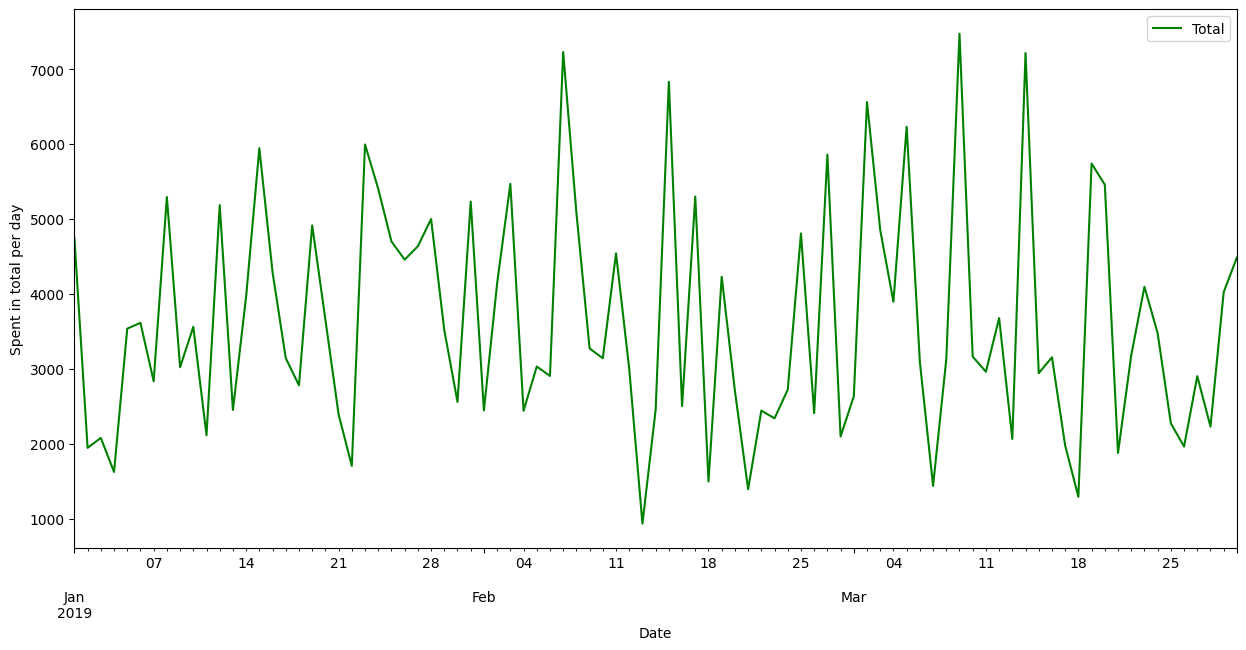

In [80]:
total_spending_per_day = df.groupby(by="Date").agg({"Total": "sum"})
total_spending_per_day.plot(figsize=(15, 7), color="green", ylabel="Spent in total per day");

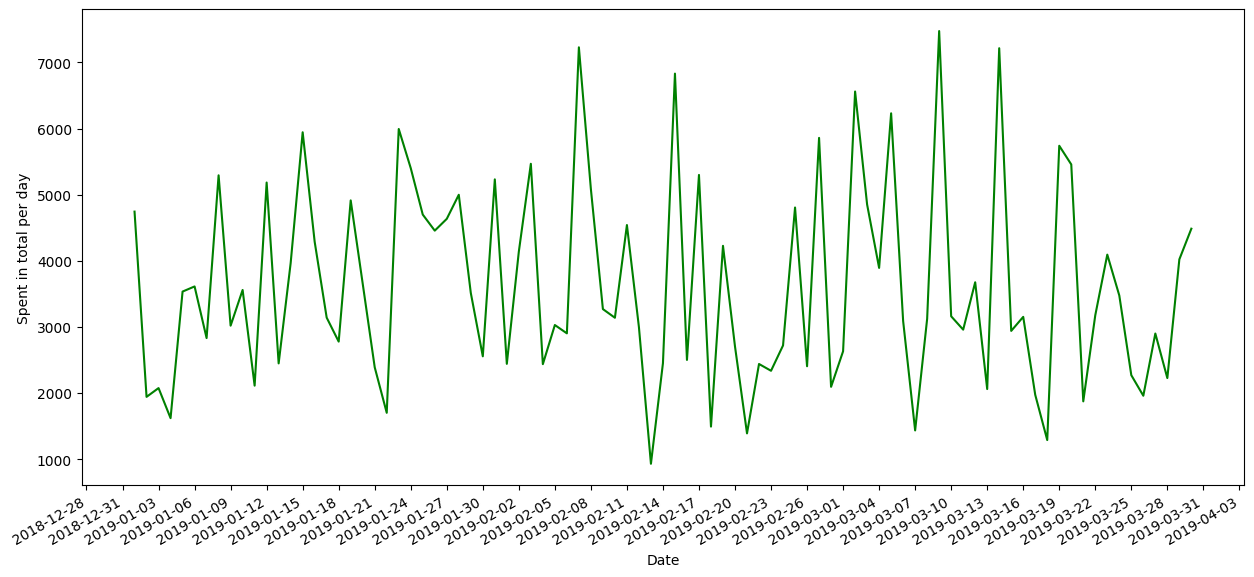

In [81]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Spent in total per day")
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.plot(total_spending_per_day, color="green");

10. А тепер побудуйте графік кількості подобових продажів в кожному філіалі (Branch). Вкажіть розмір фігури (10, 6). На одному графіку має відображатись лінія для кожного філіалу. Лінії мають бути різного кольору. Кількість продажів можна порахувати як кількість унікальних Invoice ID.

Один зі способів виконання завдання є створення наступної структури даних:
1. зробити індексом дату
2. колонки - це назви філіалів
3. Значення кількість продажів в конкретну дану в конкретному філіалу
4. Зробити таку транформацію можна за допомогою функції `pivot_table()`
5. Таку таблицю можна легко відобразити на графіку за допомогою функції `DataFrame.plot()`  


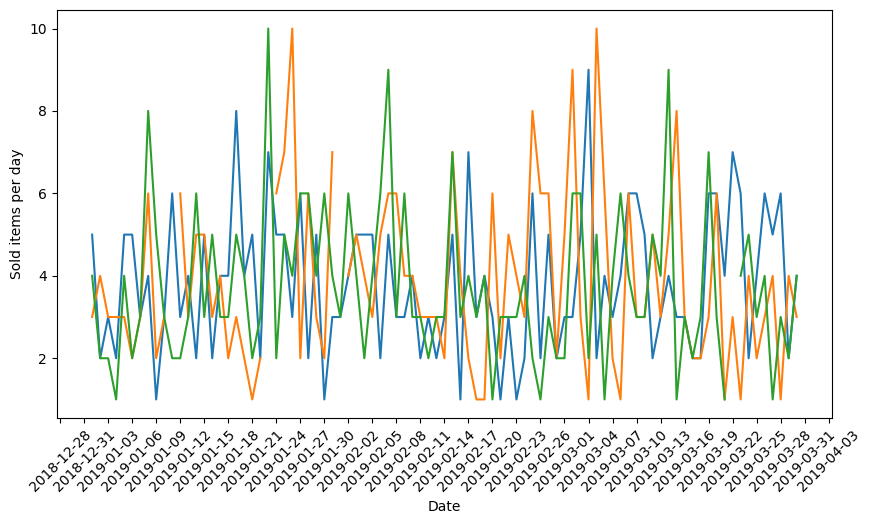

In [111]:
sales_per_branch = pd.pivot_table(
    df, values=["Invoice ID"],
    index=["Date"],
    columns=["Branch"],
    aggfunc={"Invoice ID": "count"},
)

plt.figure(figsize=(10, 6));
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Sold items per day")
plt.plot(sales_per_branch);

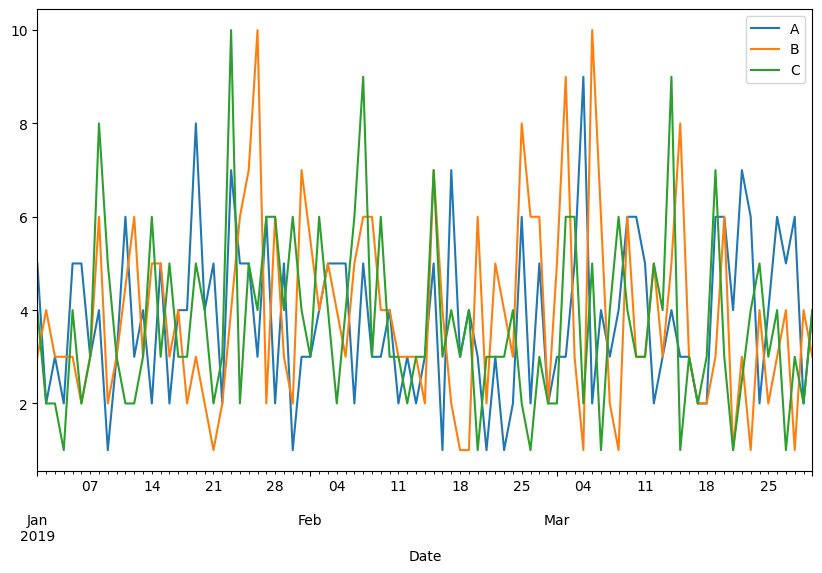

In [112]:
# without pivot_table
sales_per_branch_new = df.groupby(["Date", "Branch"]).agg({"Invoice ID": "count"}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
fig.figsize = (15, 7)

for key, group in sales_per_branch_new.groupby("Branch"):
    ax = group.plot(ax=ax, x="Date", y="Invoice ID", label=key)

Воу-воу, якось тяжко зрозуміти щось на такому графіку. Давайте спробуємо інакше. Покажіть кількість продажів для кодного філіала на окремому графіку.
Досить просто зробити це, вказавши `subplots=True` в функції `plot()`.  
Задайте розмір фігури (10,10).

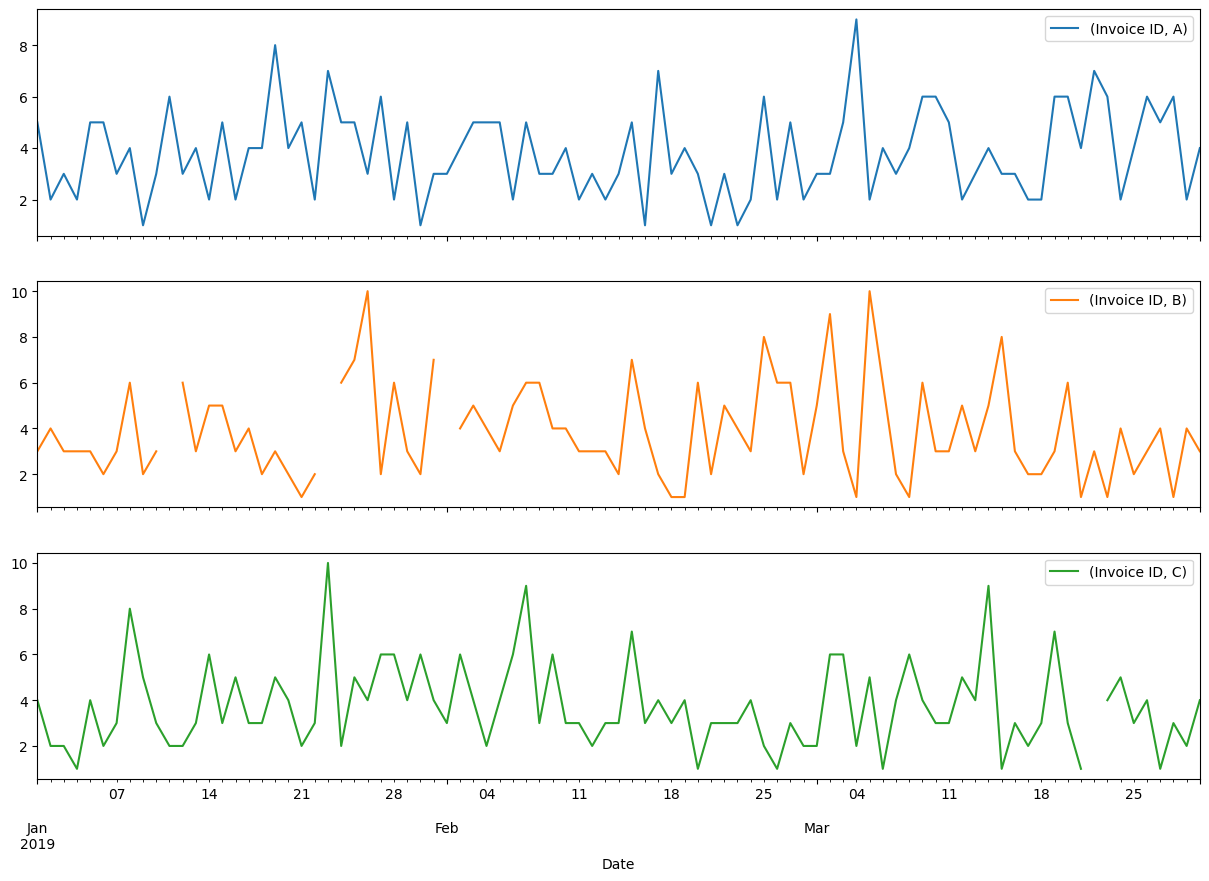

In [114]:
sales_per_branch.plot(figsize=(15, 10), subplots=True);

<font color='blue'>**[Optional]**</font> Давайте зробимо графіки ще зручнішими для сприйняття. Хочеться їх трохи згладити. Одним з методів згладування є ковзне середнє (Moving Average - MA). Суть методу полягає в тому, що значення кожної точки дорівнює середньому значенню N попередніх точок. Це один з найпростіших методів згладжування набору статистичних даних і має кілька варіацій. [Тут](https://www.youtube.com/watch?v=7Rz_ITRIADg) непогано відео на тему. 
 
Для того, щоб порахувати ковзне середнє можемо використати функцію [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по филиалам. 

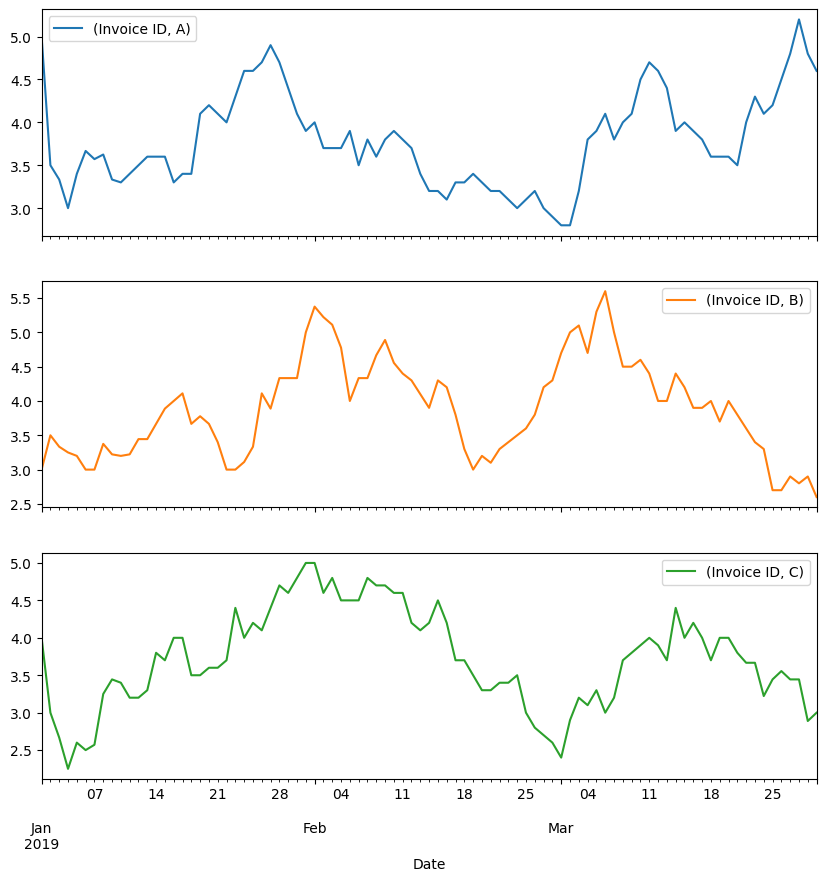

In [119]:
rolling_avg = sales_per_branch.rolling(window=10, min_periods=1).mean()
rolling_avg.plot(figsize=(10, 10), subplots=True);

12. В якому місті знаходиться кожен з філіалів?

In [121]:
cities_per_branch = df.groupby("Branch")["City"].first()
cities = df["City"].unique()
assert len(cities) == len(cities_per_branch)
cities_per_branch

Branch
A       Yangon
B     Mandalay
C    Naypyitaw
Name: City, dtype: object

In [132]:
branch_lookup = {}
for city in df.City.unique():
    branch = df[df.City == city]["Branch"].unique()
    branch_lookup[city] = branch[0]
    
pd.Series(branch_lookup)

Yangon       A
Naypyitaw    C
Mandalay     B
dtype: object

12. В яких містах покупці частіше розраховуються готівкоюй (`Cash`), а в яких - електронним гаманцем (`Ewallet`)?  
Для виконання цього завдання можна сформувати таблицю, де стрічки будуть відповідати способам оплати (`Payment`), в стовпці - `City`, значення - кількість покупок (вони ж -  продажі).

Цікавить саме відсоткове співвідношення покупок зроблених різними способами =)

In [155]:
sales_by_type_per_city = pd.pivot_table(
    df, values=["Invoice ID"],
    index=["Payment"],
    columns=["City"],
    aggfunc="count",
)

sales_by_type_per_city.apply(lambda x: x/x.sum(), axis=1) * 100

Invoice ID                      
City          Mandalay  Naypyitaw     Yangon
Payment                                     
Cash         31.976744  36.046512  31.976744
Credit card  35.048232  31.511254  33.440514
Ewallet      32.753623  30.724638  36.521739

<font color='blue'>**[Optional]**</font> 13. Давайте тепер проаналізуємо розподіл цін на товари в різних продуктових лінійках. Наша ціль - знайти відповідь на питання: в якій продуктовій лінійці найбільше дорогих товарів (90-100 у.о.)?

Для початку побудуємо візуалізацію і зробимо це кількома способами. Подумайте, яка є більш інформативною для вас і яку би ви використали для роботи.


  13.1.  На одній фігурі відобразіть гістограму розподілу цін на товари для кожної продуктової лінійкию Тобто на одній фігурі кількість гістограм рівна кількості продуктових лінійок.

In [144]:
unit_price_per_line = pd.pivot_table(
    df, values=["Unit price"],
    index=df.index,
    columns=["Product line"],
    aggfunc="sum",
    dropna=True,
)
unit_price_per_line

Unit price                                          
Product line Electronic accessories Fashion accessories Food and beverages   
0                               NaN                 NaN                NaN  \
1                             15.28                 NaN                NaN   
2                               NaN                 NaN                NaN   
3                               NaN                 NaN                NaN   
4                               NaN                 NaN                NaN   
..                              ...                 ...                ...   
995                             NaN                 NaN                NaN   
996                             NaN                 NaN                NaN   
997                             NaN                 NaN              31.84   
998                             NaN                 NaN                NaN   
999                             NaN               88.34                NaN   

                                                                     
Product line Health and beauty Home and lifestyle Sports and travel  
0                        74.69                NaN               NaN  
1                          NaN                NaN               NaN  
2                          NaN              46.33               NaN  
3                        58.22                NaN               NaN  
4                          NaN                NaN             86.31  
..                         ...                ...               ...  
995                      40.35                NaN               NaN  
996                        NaN              97.38               NaN  
997                        NaN                NaN               NaN  
998                        NaN              65.82               NaN  
999                        NaN                NaN               NaN  

[1000 rows x 6 columns]

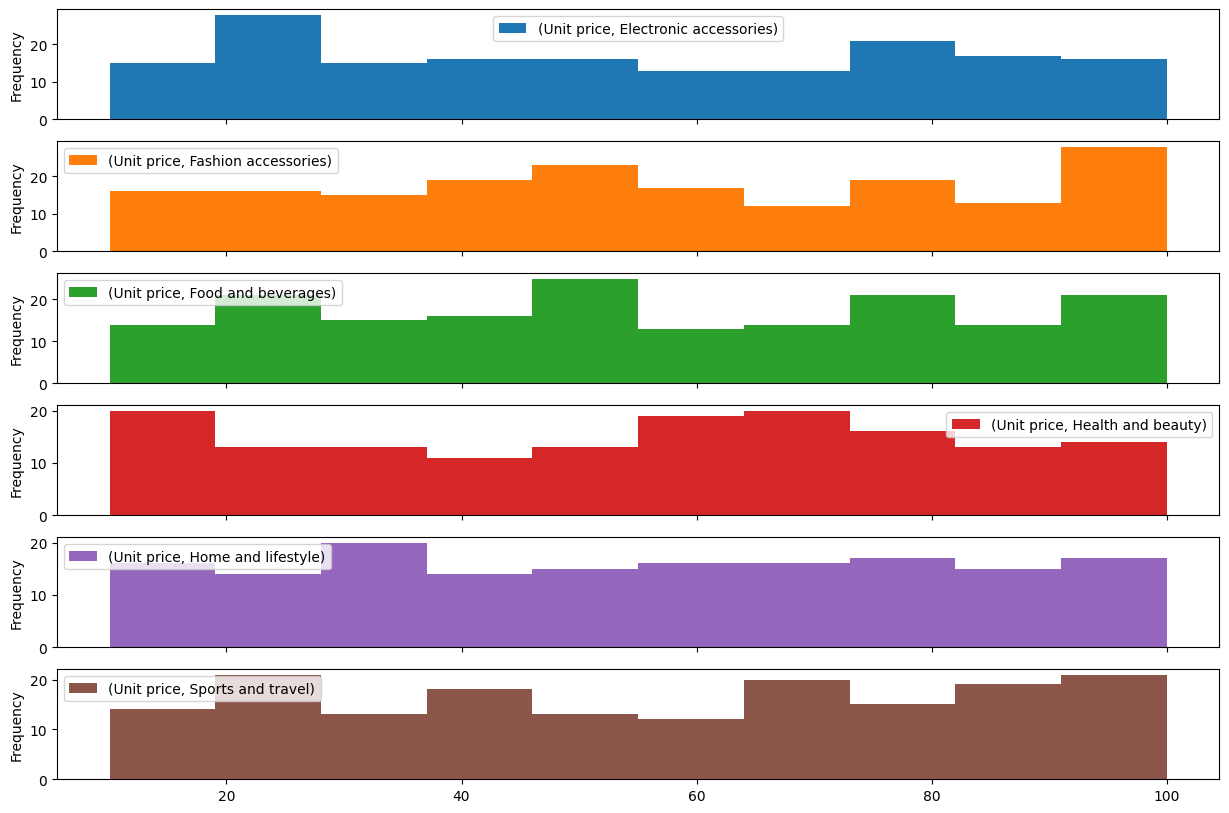

In [145]:
unit_price_per_line.plot.hist(figsize=(15, 10), subplots=True);

13.2. А тепер відобразіть гістограми з однаковою кількість бінів на одному графікую Для зручності використовуйте прозорість alpha не більше 0.4 і переконайтесь, що гістограми різного кольору. Не забудьте про легенду, заголовок. 

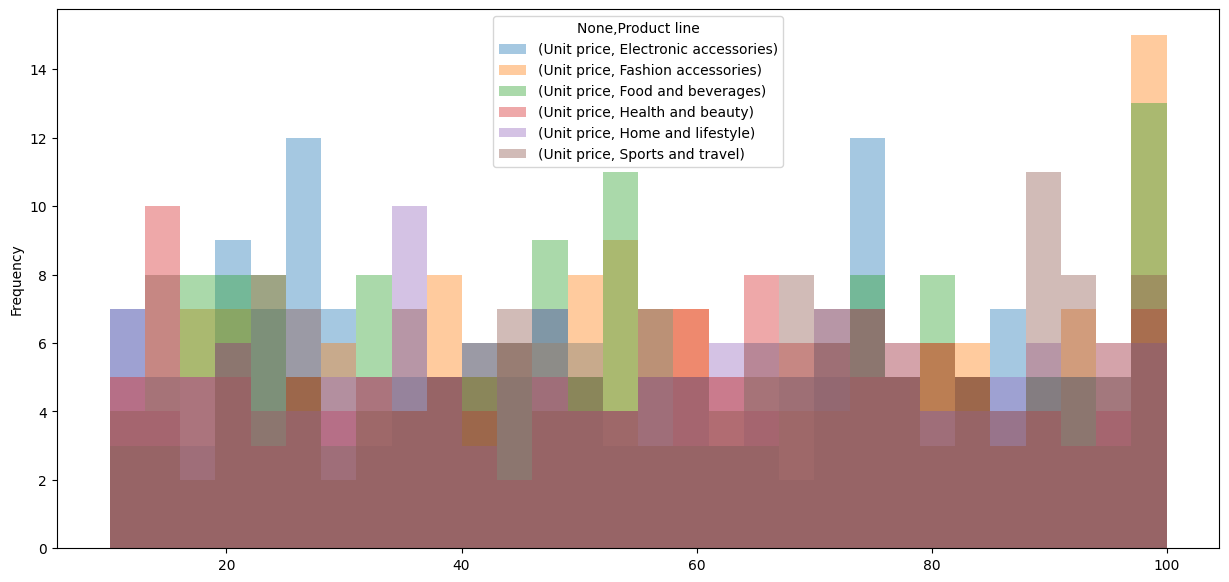

In [147]:
unit_price_per_line.plot.hist(figsize=(15, 7), alpha=.4, bins=30);

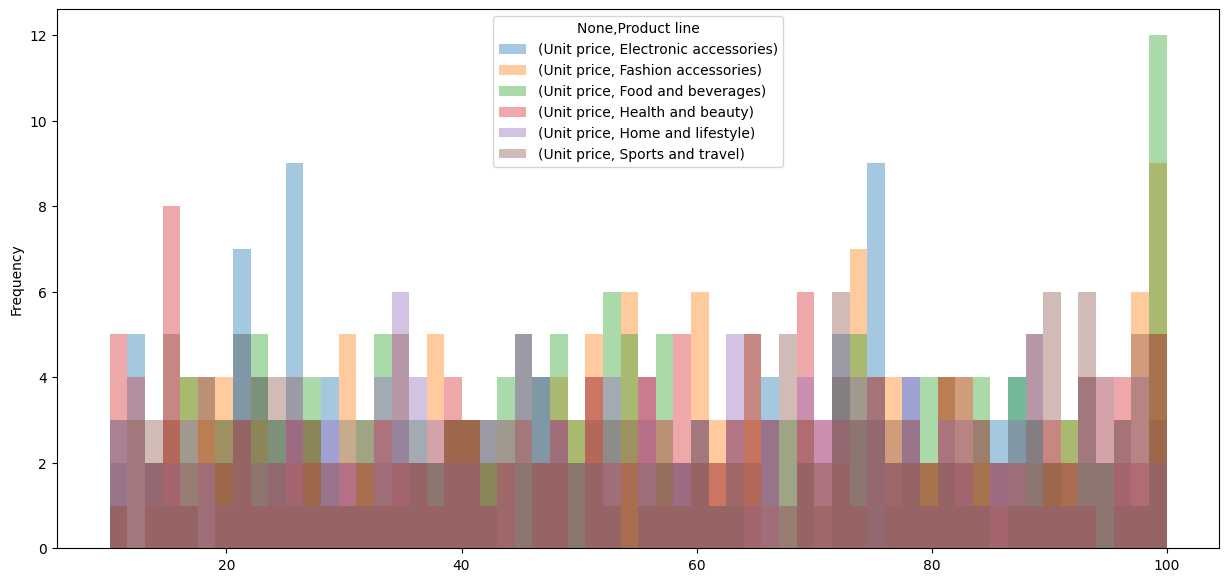

In [148]:
unit_price_per_line.plot.hist(figsize=(15, 7), alpha=.4, bins=60);

То яка візуалізація виявилась для вас зручнішою і чому?

second one is better, but visualization depends on the number of bins

13.3. А тепер знайдіть відповідь на питання за допомогою функцій numpy і pandas.

In [149]:
high_value_units = df[df["Unit price"] > 90]

high_value_units.groupby(by=["Product line"])["Unit price"].count().sort_values(ascending=False)

Product line
Fashion accessories       29
Sports and travel         25
Food and beverages        22
Electronic accessories    18
Home and lifestyle        18
Health and beauty         15
Name: count, dtype: int64

In [150]:
high_value_units.value_counts("Product line")

Product line
Fashion accessories       29
Sports and travel         25
Food and beverages        22
Electronic accessories    18
Home and lifestyle        18
Health and beauty         15
Name: count, dtype: int64

Answer: Fashion accessories